In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("dataset_marketing.csv")

In [3]:
df

,Unnamed: 0,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.112652,8858,3.273500,Chicago,Spanish,666,2271,6,Health & Wellness,2021-01-01
1,1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.093980,4634,4.251808,New York,German,434,4886,7,Fashionistas,2021-01-02
2,2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.190328,24372,5.985002,Los Angeles,French,2537,5471,9,Outdoor Adventurers,2021-01-03
3,3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.196264,38474,6.370724,Miami,Mandarin,1615,12321,9,Health & Wellness,2021-01-04
4,4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.205403,24317,4.975072,Los Angeles,Mandarin,1566,3470,8,Health & Wellness,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.255202,33647,5.873354,Chicago,German,1614,12090,9,Tech Enthusiasts,2021-12-07
199996,199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.191164,9013,5.109651,Chicago,Spanish,784,4205,6,Foodies,2021-12-08
199997,199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.086460,7426,3.181557,New York,Mandarin,3252,7532,8,Tech Enthusiasts,2021-12-09
199998,199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.209652,18551,7.427260,Houston,French,2514,6745,9,Foodies,2021-12-10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        200000 non-null  int64  
 1   Campaign_ID       200000 non-null  int64  
 2   Company           200000 non-null  object 
 3   Campaign_Type     200000 non-null  object 
 4   Target_Audience   200000 non-null  object 
 5   Duration          200000 non-null  object 
 6   Channel_Used      200000 non-null  object 
 7   Conversion_Rate   200000 non-null  float64
 8   Acquisition_Cost  200000 non-null  int64  
 9   ROI               200000 non-null  float64
 10  Location          200000 non-null  object 
 11  Language          200000 non-null  object 
 12  Clicks            200000 non-null  int64  
 13  Impressions       200000 non-null  int64  
 14  Engagement_Score  200000 non-null  int64  
 15  Customer_Segment  200000 non-null  object 
 16  Date              20

In [5]:
# Check null value in the dataset
df.isnull().sum()

Unnamed: 0          0
Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [6]:
# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

## There are no missing values

### Data Preprocessing Tasks

1. **Column Name Cleaning**:  
   - Removes any leading or trailing spaces from the column names to ensure consistency and avoid issues when accessing columns programmatically.

2. **Data Type Conversion**:  
   - Converts the `Campaign_ID` column from a float to a string.
   - Converts the `Date` column to a datetime format, ensuring that these columns are in the correct data types for analysis.

3. **Monetary Data Cleaning**:  
   - Cleans the `Acquisition_Cost` column by removing currency symbols and commas.
   - Converts it from a string to a float for accurate numerical analysis.

## not converting the categorical features to numerical features as our primary goal  here is to perform analysis and insights and identify trends

### date has 1st jan 2021 to 31 dec 2021

In [7]:
df.describe()

,Unnamed: 0,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,100000.500000,0.168732,15405.597890,7.003095,1874.245790,6935.462435,8.096900
std,57735.171256,57735.171256,0.056817,10266.112237,2.264581,756.232913,2140.546677,2.073042
min,0.000000,1.000000,0.050003,500.000000,2.000765,100.000000,2000.000000,4.000000
25%,49999.750000,50000.750000,0.125773,7775.000000,5.278241,1366.000000,5399.000000,7.000000
50%,99999.500000,100000.500000,0.166789,12966.000000,6.827811,1846.000000,6808.000000,8.000000
75%,149999.250000,150000.250000,0.211130,20892.250000,8.660180,2410.000000,8267.000000,9.000000
max,199999.000000,200000.000000,0.299994,49987.000000,12.999661,3699.000000,12999.000000,13.000000


In [8]:
# Unique values of 'Company' 
company_values = df['Company'].value_counts()
print("Total unique categories of Company column:\n", company_values)

Total unique categories of Company column:
 Company
TechCorp               40237
Alpha Innovations      40051
DataTech Solutions     40012
NexGen Systems         39991
Innovate Industries    39709
Name: count, dtype: int64


In [9]:
# Unique values of 'Campaign_Type'
campaign_values = df['Campaign_Type'].value_counts()
print("Total unique categories of Campaign Type column:\n", campaign_values)

Total unique categories of Campaign Type column:
 Campaign_Type
Influencer      40169
Search          40157
Display         39987
Email           39870
Social Media    39817
Name: count, dtype: int64


In [10]:
# Unique values of 'Target_Audience'
target_audience_values = df['Target_Audience'].value_counts()
print("Total unique categories of Target Audience:\n", target_audience_values)

Total unique categories of Target Audience:
 Target_Audience
Men 18-24      40258
Men 25-34      40023
All Ages       40019
Women 25-34    40013
Women 35-44    39687
Name: count, dtype: int64


In [11]:
# Unique values of 'Channel_Used'
channels_values = df['Channel_Used'].value_counts()
print("Total unique Channels Used:\n", channels_values)

Total unique Channels Used:
 Channel_Used
Email         33599
Google Ads    33438
YouTube       33392
Instagram     33392
Website       33360
Facebook      32819
Name: count, dtype: int64


In [12]:
# Unique values of 'Language'
languages = df['Language'].value_counts()
print("Total number of unique Languages:", languages)

Total number of unique Languages: Language
Mandarin    40255
Spanish     40102
German      39983
English     39896
French      39764
Name: count, dtype: int64


In [13]:
# Unique values of 'Customer_Segment'
customer_segments = df['Customer_Segment'].value_counts()
print("Total number of unique Customer Segments:\n", customer_segments)

Total number of unique Customer Segments:
 Customer_Segment
Foodies                40208
Tech Enthusiasts       40151
Outdoor Adventurers    40011
Health & Wellness      39888
Fashionistas           39742
Name: count, dtype: int64


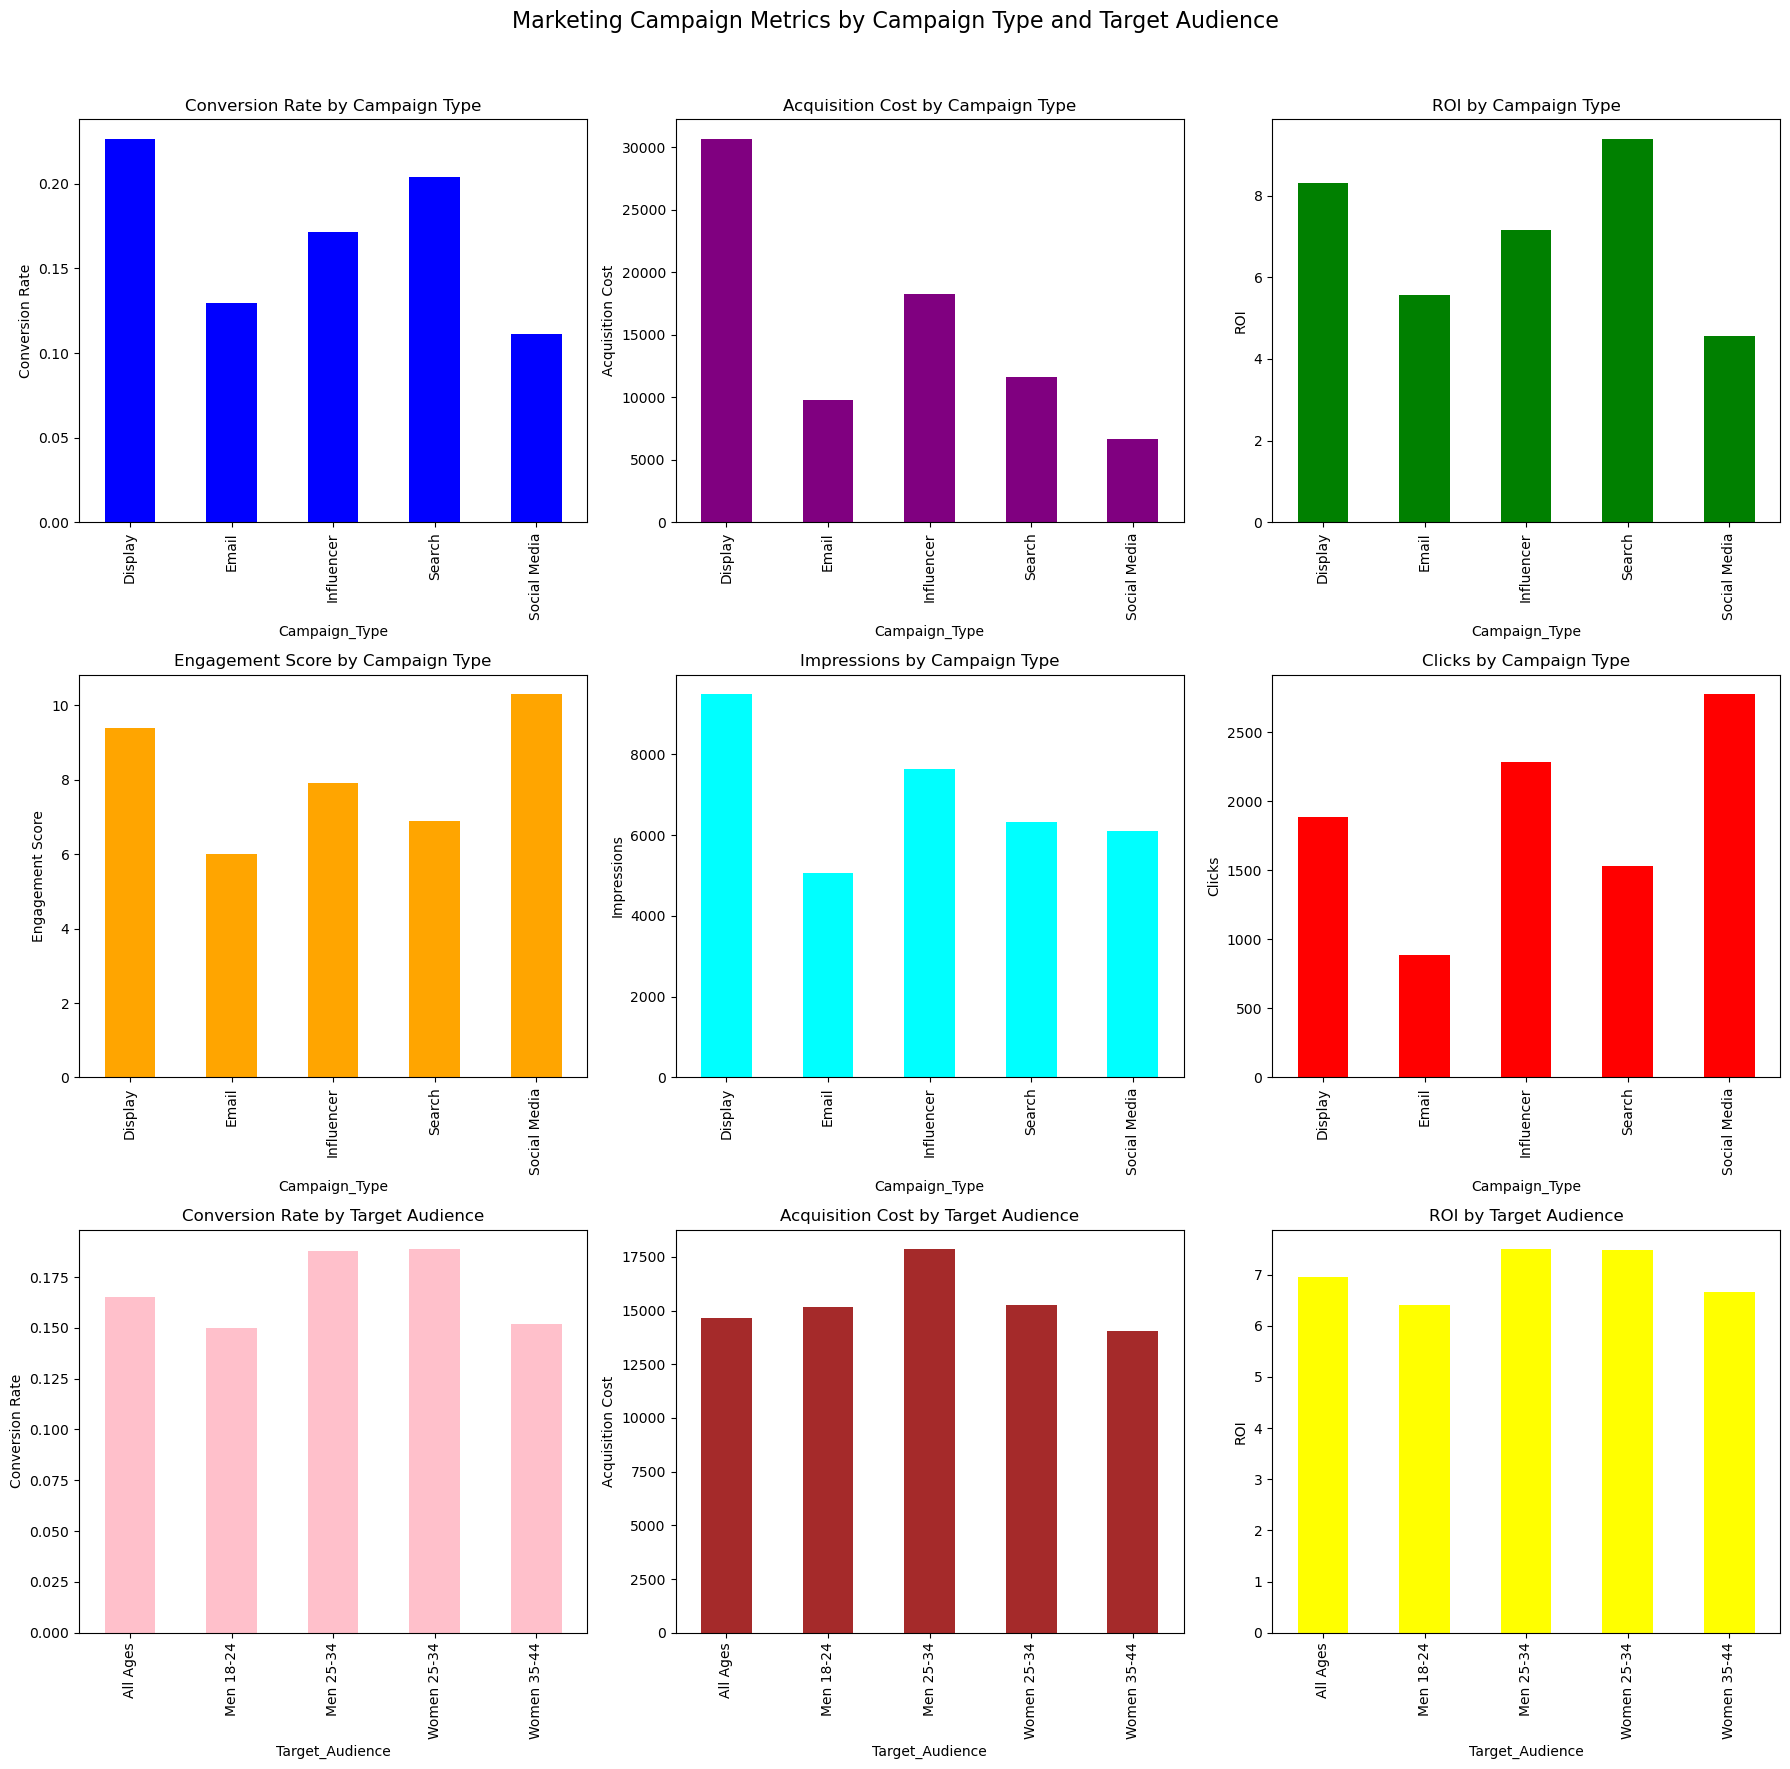

In [14]:
# Set up a 3x3 plot grid
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle("Marketing Campaign Metrics by Campaign Type and Target Audience", fontsize=16)
 
# Graph 1: Conversion Rate by Campaign Type
df.groupby('Campaign_Type')['Conversion_Rate'].mean().plot(kind='bar', color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Conversion Rate by Campaign Type')
axes[0, 0].set_ylabel('Conversion Rate')
 
# Graph 2: Acquisition Cost by Campaign Type
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'], errors='coerce')  # Ensure Acquisition_Cost is numeric
df.groupby('Campaign_Type')['Acquisition_Cost'].mean().plot(kind='bar', color='purple', ax=axes[0, 1])
axes[0, 1].set_title('Acquisition Cost by Campaign Type')
axes[0, 1].set_ylabel('Acquisition Cost')
 
# Graph 3: ROI by Campaign Type
df.groupby('Campaign_Type')['ROI'].mean().plot(kind='bar', color='green', ax=axes[0, 2])
axes[0, 2].set_title('ROI by Campaign Type')
axes[0, 2].set_ylabel('ROI')
 
# Graph 4: Engagement Score by Campaign Type
df.groupby('Campaign_Type')['Engagement_Score'].mean().plot(kind='bar', color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Engagement Score by Campaign Type')
axes[1, 0].set_ylabel('Engagement Score')
 
# Graph 5: Impressions by Campaign Type
df.groupby('Campaign_Type')['Impressions'].mean().plot(kind='bar', color='cyan', ax=axes[1, 1])
axes[1, 1].set_title('Impressions by Campaign Type')
axes[1, 1].set_ylabel('Impressions')
 
# Graph 6: Clicks by Campaign Type
df.groupby('Campaign_Type')['Clicks'].mean().plot(kind='bar', color='red', ax=axes[1, 2])
axes[1, 2].set_title('Clicks by Campaign Type')
axes[1, 2].set_ylabel('Clicks')
 
# Graph 7: Conversion Rate by Target Audience
df.groupby('Target_Audience')['Conversion_Rate'].mean().plot(kind='bar', color='pink', ax=axes[2, 0])
axes[2, 0].set_title('Conversion Rate by Target Audience')
axes[2, 0].set_ylabel('Conversion Rate')
 
# Graph 8: Acquisition Cost by Target Audience
df.groupby('Target_Audience')['Acquisition_Cost'].mean().plot(kind='bar', color='brown', ax=axes[2, 1])
axes[2, 1].set_title('Acquisition Cost by Target Audience')
axes[2, 1].set_ylabel('Acquisition Cost')
 
# Graph 9: ROI by Target Audience
df.groupby('Target_Audience')['ROI'].mean().plot(kind='bar', color='yellow', ax=axes[2, 2])
axes[2, 2].set_title('ROI by Target Audience')
axes[2, 2].set_ylabel('ROI')
 
# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

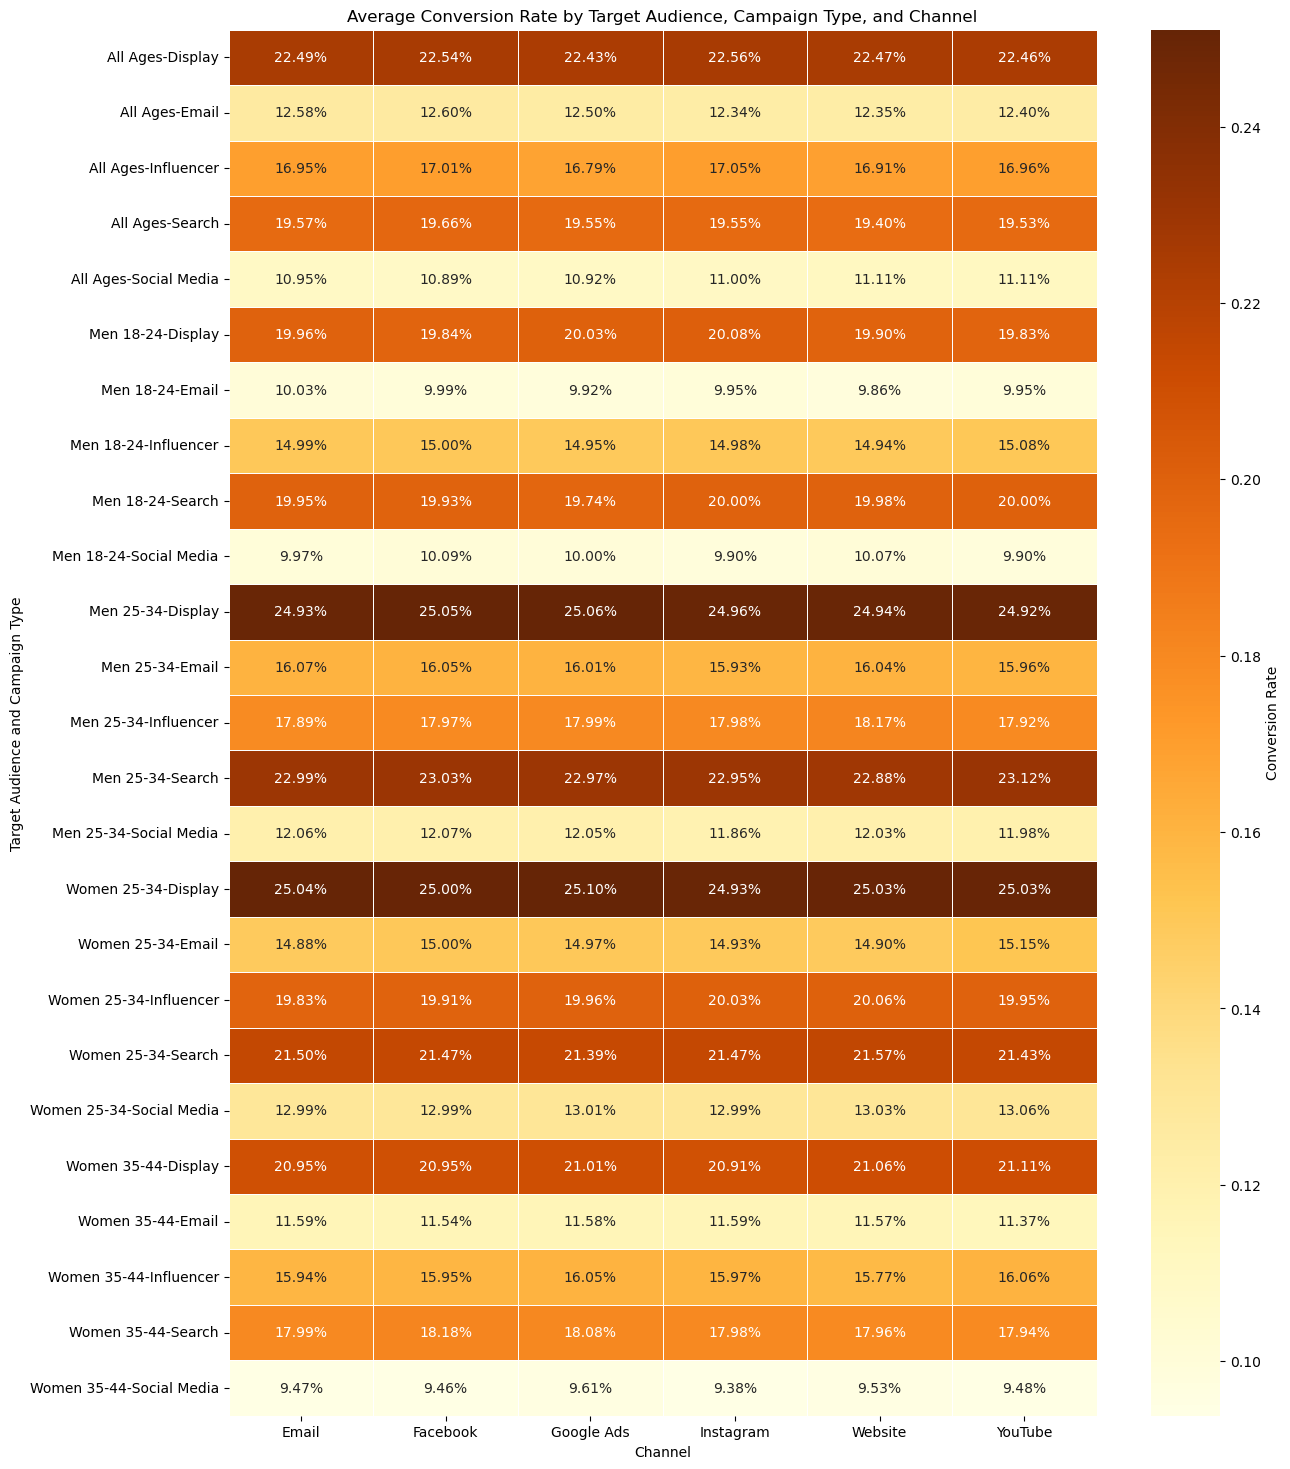

In [15]:
# Calculate the average Conversion Rate grouped by Target Audience, Campaign Type, and Channel Used
conversion_rate_avg = df.groupby(['Target_Audience', 'Campaign_Type', 'Channel_Used'])['Conversion_Rate'].mean().reset_index()
 
# Pivot the data to create a matrix for the heatmap
heatmap_data = conversion_rate_avg.pivot_table(index=['Target_Audience', 'Campaign_Type'], columns='Channel_Used', values='Conversion_Rate')
 
# Plotting the heatmap
plt.figure(figsize=(14, 18))
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap="YlOrBr", cbar_kws={'label': 'Conversion Rate'}, linewidths=.5)
 
# Add titles and labels
plt.title('Average Conversion Rate by Target Audience, Campaign Type, and Channel')
plt.xlabel('Channel')
plt.ylabel('Target Audience and Campaign Type')
 
# Show the plot
plt.show()

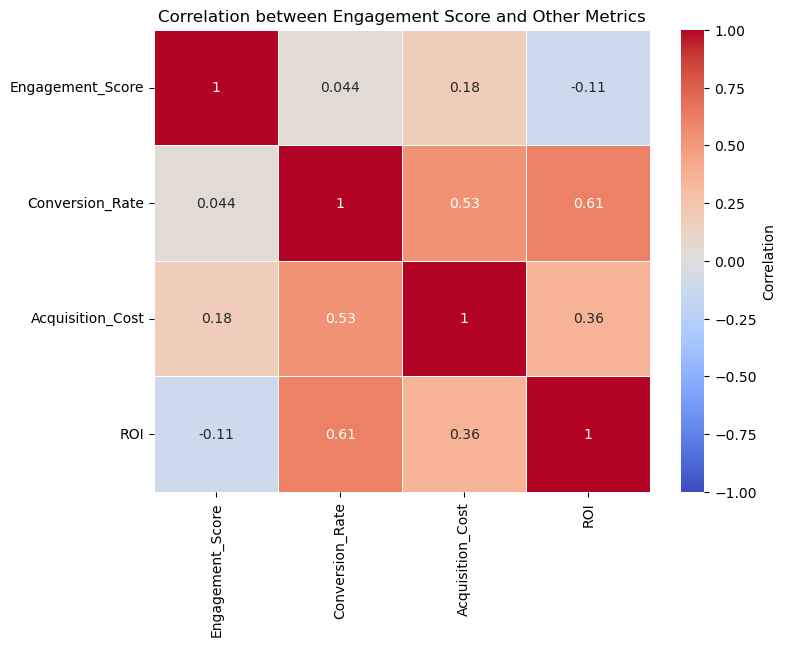

In [16]:
# Calculate the correlation matrix for relevant metrics
correlation_matrix = df[['Engagement_Score', 'Conversion_Rate', 'Acquisition_Cost', 'ROI']].corr()
 
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'}, linewidths=0.5)
 
# Add titles and labels
plt.title('Correlation between Engagement Score and Other Metrics')
plt.show()

In [18]:
# Convert Campaign_ID column from float to object
df['Campaign_ID'] = df['Campaign_ID'].astype(str)

# Convert into a correct datatype
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

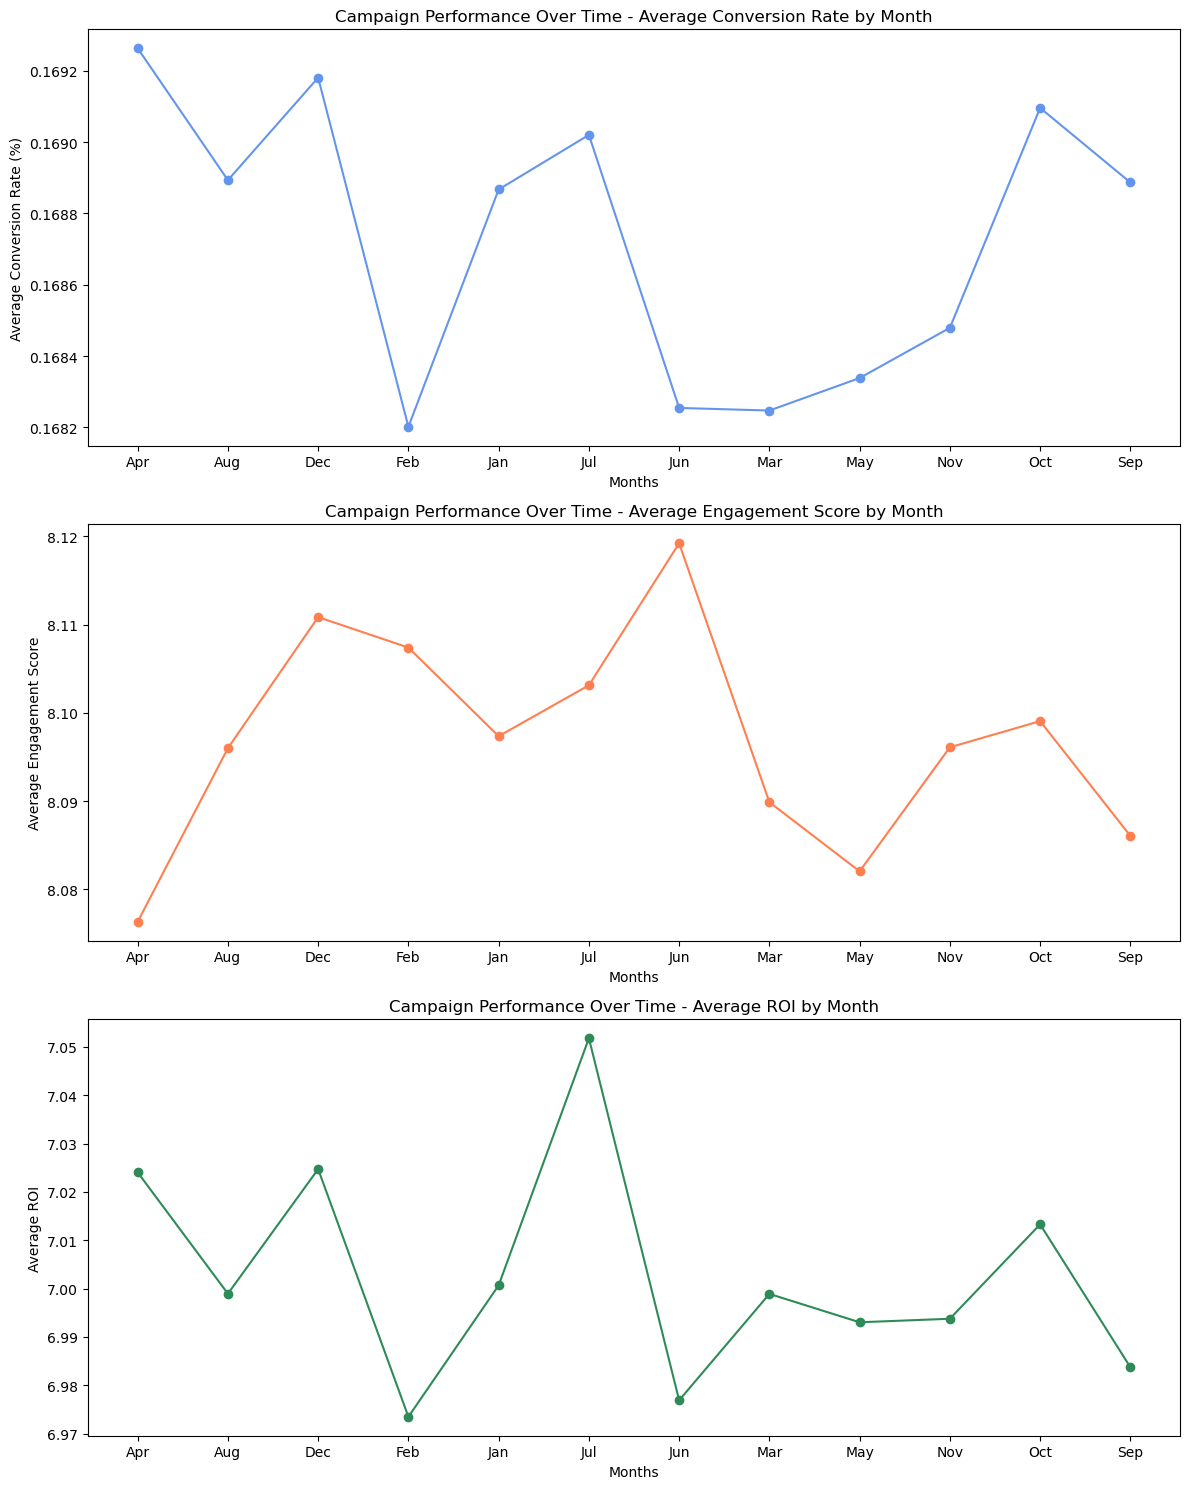

In [19]:
df['Month'] = df['Date'].dt.month_name().str[:3]  # Extract month name abbreviation (e.g., 'Jan')
 
# Calculate monthly averages for each metric
monthly_conversion_rate = df.groupby('Month')['Conversion_Rate'].mean()
monthly_engagement_score = df.groupby('Month')['Engagement_Score'].mean()
monthly_roi = df.groupby('Month')['ROI'].mean()
 
# Set up subplots for each metric
fig, axes = plt.subplots(3, 1, figsize=(12, 15))
 
# Plot 1: Average Conversion Rate by Month
axes[0].plot(monthly_conversion_rate.index, monthly_conversion_rate.values, marker='o', color='cornflowerblue')
axes[0].set_title("Campaign Performance Over Time - Average Conversion Rate by Month")
axes[0].set_xlabel("Months")
axes[0].set_ylabel("Average Conversion Rate (%)")
 
# Plot 2: Average Engagement Score by Month
axes[1].plot(monthly_engagement_score.index, monthly_engagement_score.values, marker='o', color='coral')
axes[1].set_title("Campaign Performance Over Time - Average Engagement Score by Month")
axes[1].set_xlabel("Months")
axes[1].set_ylabel("Average Engagement Score")
 
# Plot 3: Average ROI by Month
axes[2].plot(monthly_roi.index, monthly_roi.values, marker='o', color='seagreen')
axes[2].set_title("Campaign Performance Over Time - Average ROI by Month")
axes[2].set_xlabel("Months")
axes[2].set_ylabel("Average ROI")
 
# Adjust layout and show plots
plt.tight_layout()
plt.show()

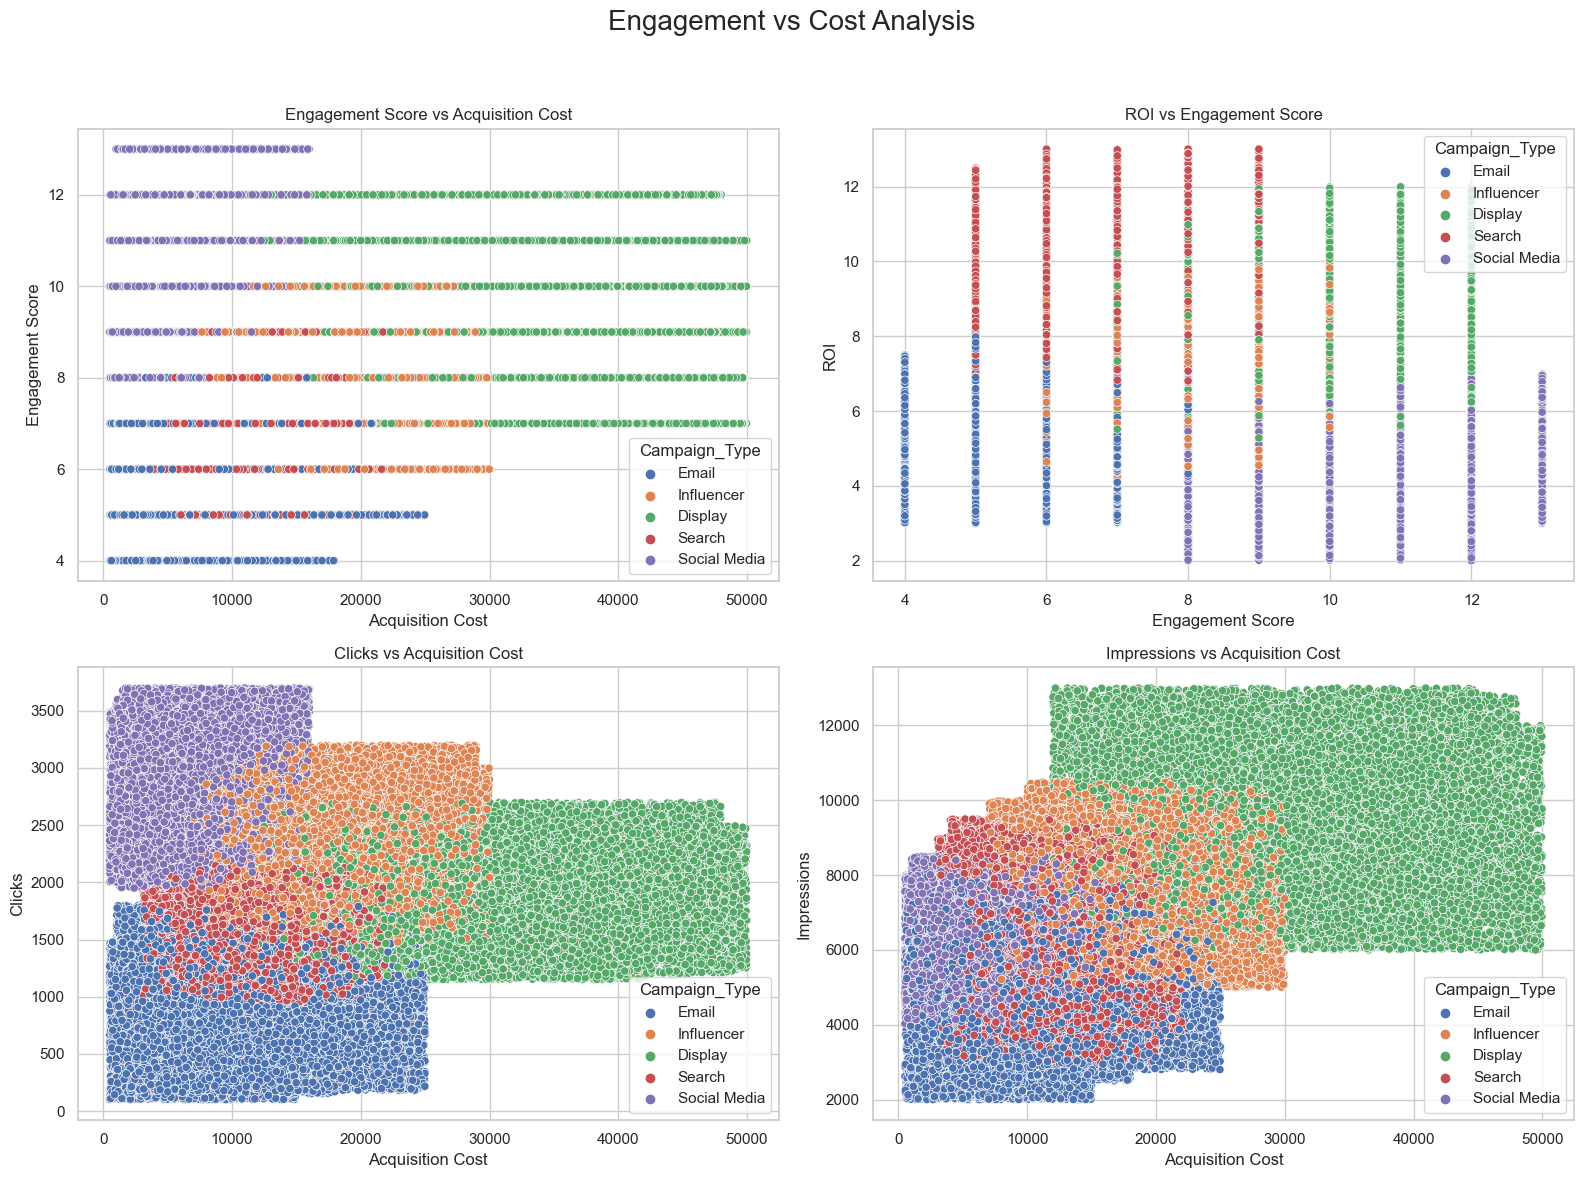

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the plot style
sns.set(style="whitegrid")

# Initialize the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Engagement vs Cost Analysis', fontsize=20)

# Scatter plot: Engagement Score vs Acquisition Cost
sns.scatterplot(ax=axes[0, 0], data=df, x='Acquisition_Cost', y='Engagement_Score', hue='Campaign_Type')
axes[0, 0].set_title('Engagement Score vs Acquisition Cost')
axes[0, 0].set_xlabel('Acquisition Cost')
axes[0, 0].set_ylabel('Engagement Score')

# Scatter plot: ROI vs Engagement Score
sns.scatterplot(ax=axes[0, 1], data=df, x='Engagement_Score', y='ROI', hue='Campaign_Type')
axes[0, 1].set_title('ROI vs Engagement Score')
axes[0, 1].set_xlabel('Engagement Score')
axes[0, 1].set_ylabel('ROI')

# Scatter plot: Clicks vs Acquisition Cost
sns.scatterplot(ax=axes[1, 0], data=df, x='Acquisition_Cost', y='Clicks', hue='Campaign_Type')
axes[1, 0].set_title('Clicks vs Acquisition Cost')
axes[1, 0].set_xlabel('Acquisition Cost')
axes[1, 0].set_ylabel('Clicks')

# Scatter plot: Impressions vs Acquisition Cost
sns.scatterplot(ax=axes[1, 1], data=df, x='Acquisition_Cost', y='Impressions', hue='Campaign_Type')
axes[1, 1].set_title('Impressions vs Acquisition Cost')
axes[1, 1].set_xlabel('Acquisition Cost')
axes[1, 1].set_ylabel('Impressions')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [24]:
# A/B Testing

import numpy as np
from scipy import stats

print(df.columns)

import pandas as pd
from scipy import stats

# Define metrics to compare
metrics = ['Conversion_Rate', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']
alpha = 0.05  # significance level

# Initialize a list to store results
results = []

# Nuanced groupings
groupings = [('Campaign_Type', 'Channel_Used'), 
             ('Target_Audience', 'Channel_Used'), 
             ('Customer_Segment', 'Channel_Used')]

# Loop over each grouping and metric
for grouping in groupings:
    group_1, group_2 = grouping
    
    # Get unique combinations for each grouping
    unique_combinations = df[[group_1, group_2]].drop_duplicates()
    
    # Perform A/B tests for each metric across combinations within the grouping
    for metric in metrics:
        for i in range(len(unique_combinations)):
            for j in range(i + 1, len(unique_combinations)):
                comb_a = unique_combinations.iloc[i]
                comb_b = unique_combinations.iloc[j]
                
                # Filter the dataset by each combination
                group_a = df[(df[group_1] == comb_a[group_1]) & (df[group_2] == comb_a[group_2])][metric]
                group_b = df[(df[group_1] == comb_b[group_1]) & (df[group_2] == comb_b[group_2])][metric]
                
                # Ensure both groups have data before testing
                if len(group_a) > 1 and len(group_b) > 1:
                    # Perform t-test
                    t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)
                    
                    # Store result
                    result = {
                        'Metric': metric,
                        'Group_1_Type': group_1,
                        'Group_1_Value': comb_a[group_1],
                        'Group_2_Type': group_2,
                        'Group_2_Value': comb_a[group_2],
                        'Comparison_Type_1': comb_b[group_1],
                        'Comparison_Type_2': comb_b[group_2],
                        'T-statistic': t_stat,
                        'P-value': p_value,
                        'Significant': p_value < alpha
                    }
                    results.append(result)

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display all results and highlight statistically significant comparisons
significant_results = results_df[results_df['Significant']]

print("Full A/B Test Results:\n", results_df)
print("\nStatistically Significant Results:\n", significant_results)

Index(['Unnamed: 0', 'Campaign_ID', 'Company', 'Campaign_Type',
       'Target_Audience', 'Duration', 'Channel_Used', 'Conversion_Rate',
       'Acquisition_Cost', 'ROI', 'Location', 'Language', 'Clicks',
       'Impressions', 'Engagement_Score', 'Customer_Segment', 'Date', 'Month'],
      dtype='object')
Full A/B Test Results:
                 Metric      Group_1_Type        Group_1_Value  Group_2_Type  \
0      Conversion_Rate     Campaign_Type                Email  Channel_Used   
1      Conversion_Rate     Campaign_Type                Email  Channel_Used   
2      Conversion_Rate     Campaign_Type                Email  Channel_Used   
3      Conversion_Rate     Campaign_Type                Email  Channel_Used   
4      Conversion_Rate     Campaign_Type                Email  Channel_Used   
...                ...               ...                  ...           ...   
6520  Engagement_Score  Customer_Segment    Health & Wellness  Channel_Used   
6521  Engagement_Score  Customer_Segm

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

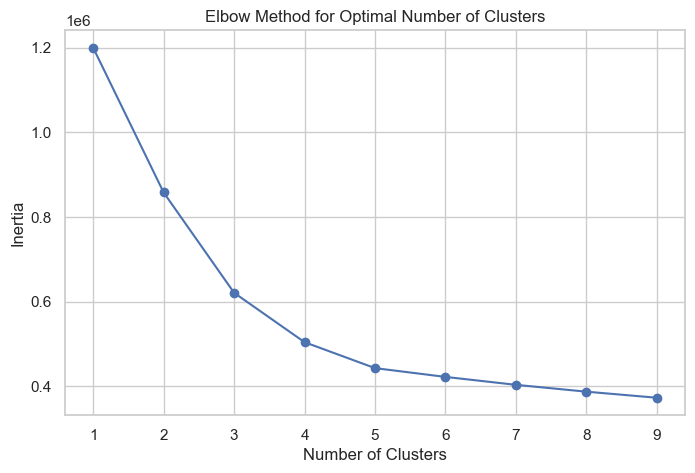

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
 
# Select features for clustering
features = df[['Engagement_Score', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
 
# Determine optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

    
    
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
 
# Apply K-Means with optimal clusters (assume k=3 from Elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(scaled_features)



C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


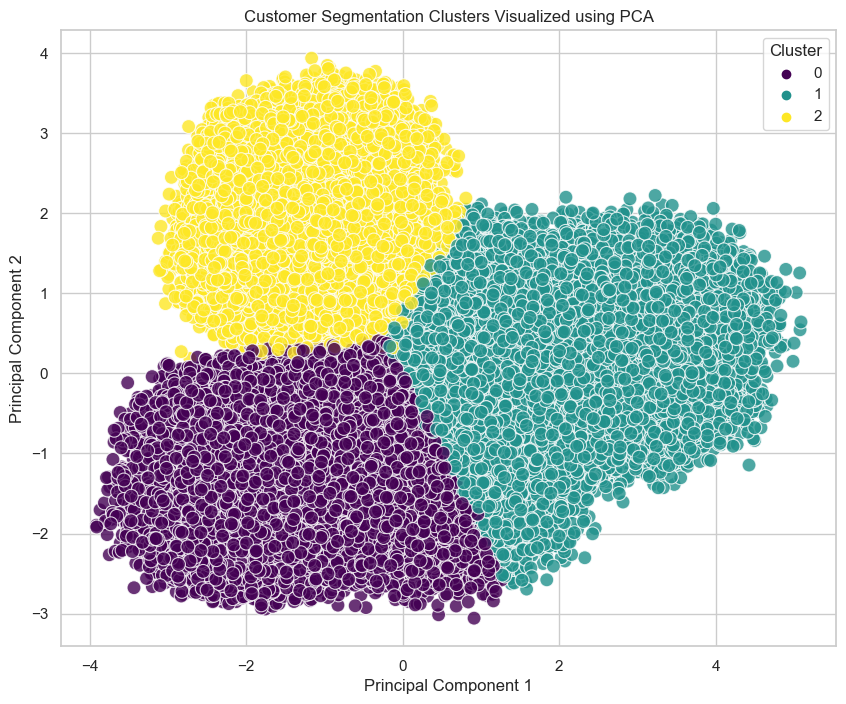

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
 
# Select relevant features for customer segmentation
features = df[['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']]
 
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
 
# Set the optimal number of clusters based on the elbow plot
optimal_clusters = 3  # Adjust this if you identified a different optimal number
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(features_scaled)
 
# Apply PCA to reduce to 2 principal components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)
 
# Add PCA components to the DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
 
# Plot the clusters based on PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segmentation Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [27]:
# Calculate the mean values of key metrics for each cluster
cluster_summary = df.groupby('Cluster').agg({
    'Conversion_Rate': 'mean',
    'Acquisition_Cost': 'mean',
    'ROI': 'mean',
    'Clicks': 'mean',
    'Impressions': 'mean',
    'Engagement_Score': 'mean'
}).reset_index()
 
# Display the summary
print("Cluster Summary:")
print(cluster_summary)
 
# Interpret the clusters based on these mean values
for index, row in cluster_summary.iterrows():
    print(f"\nCluster {int(row['Cluster'])} Interpretation:")
    print(f"Average Conversion Rate: {row['Conversion_Rate']:.2f}")
    print(f"Average Acquisition Cost: {row['Acquisition_Cost']:.2f}")
    print(f"Average ROI: {row['ROI']:.2f}")
    print(f"Average Clicks: {row['Clicks']:.2f}")
    print(f"Average Impressions: {row['Impressions']:.2f}")
    print(f"Average Engagement Score: {row['Engagement_Score']:.2f}")

Cluster Summary:
   Cluster  Conversion_Rate  Acquisition_Cost       ROI       Clicks  \
0        0         0.153817      10712.875704  6.945134  1209.015408   
1        1         0.212168      23984.473779  8.334100  1988.726280   
2        2         0.115378       7711.048778  4.718839  2752.176639   

   Impressions  Engagement_Score  
0  5463.553040          6.291237  
1  8672.321925          8.639392  
2  6226.805902         10.065751  

Cluster 0 Interpretation:
Average Conversion Rate: 0.15
Average Acquisition Cost: 10712.88
Average ROI: 6.95
Average Clicks: 1209.02
Average Impressions: 5463.55
Average Engagement Score: 6.29

Cluster 1 Interpretation:
Average Conversion Rate: 0.21
Average Acquisition Cost: 23984.47
Average ROI: 8.33
Average Clicks: 1988.73
Average Impressions: 8672.32
Average Engagement Score: 8.64

Cluster 2 Interpretation:
Average Conversion Rate: 0.12
Average Acquisition Cost: 7711.05
Average ROI: 4.72
Average Clicks: 2752.18
Average Impressions: 6226.81
Aver

In [28]:
import pandas as pd
from scipy import stats
 
# Load the dataset
data = pd.read_csv('dataset_marketing.csv')
 
# Define metrics and groupings
metrics = ['Conversion_Rate', 'ROI']  # Limiting to key metrics for faster analysis
groupings = [('Campaign_Type', 'Channel_Used'), ('Customer_Segment', 'Channel_Used')]  # Key groupings for insights
 
# Set significance level
alpha = 0.05
 
# Store results
results = []
 
# Loop through each grouping and metric for simplified comparisons
for grouping in groupings:
    group_1, group_2 = grouping
    unique_combinations = data[[group_1, group_2]].drop_duplicates()
    for metric in metrics:
        for i in range(len(unique_combinations)):
            for j in range(i + 1, len(unique_combinations)):
                comb_a = unique_combinations.iloc[i]
                comb_b = unique_combinations.iloc[j]
                # Filter data for each combination
                group_a = data[(data[group_1] == comb_a[group_1]) & (data[group_2] == comb_a[group_2])][metric]
                group_b = data[(data[group_1] == comb_b[group_1]) & (data[group_2] == comb_b[group_2])][metric]
                # Ensure sufficient data in each group
                if len(group_a) > 1 and len(group_b) > 1:
                    # Perform t-test
                    t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)
                    # Record result if significant
                    if p_value < alpha:
                        results.append({
                            'Metric': metric,
                            'Group_1': f"{comb_a[group_1]} - {comb_a[group_2]}",
                            'Group_2': f"{comb_b[group_1]} - {comb_b[group_2]}",
                            'T-statistic': t_stat,
                            'P-value': p_value
                        })

                        
# Convert results to DataFrame and filter for the top 10 significant results
results_df = pd.DataFrame(results)
top_10_summary = results_df.reindex(results_df['T-statistic'].abs().sort_values(ascending=False).index).head(10)
 
# Display the top 10 summary table
print("Top 10 Significant A/B Testing Results:")
print(top_10_summary)

Top 10 Significant A/B Testing Results:
              Metric               Group_1                    Group_2  \
109  Conversion_Rate   Display - Instagram   Social Media - Instagram   
106  Conversion_Rate   Display - Instagram       Social Media - Email   
95   Conversion_Rate   Display - Instagram    Social Media - Facebook   
100  Conversion_Rate   Display - Instagram  Social Media - Google Ads   
98   Conversion_Rate   Display - Instagram     Social Media - YouTube   
66   Conversion_Rate     Display - YouTube   Social Media - Instagram   
63   Conversion_Rate     Display - YouTube       Social Media - Email   
201  Conversion_Rate       Display - Email   Social Media - Instagram   
198  Conversion_Rate       Display - Email       Social Media - Email   
341  Conversion_Rate  Display - Google Ads   Social Media - Instagram   

     T-statistic  P-value  
109   204.875620      0.0  
106   204.820957      0.0  
95    203.337077      0.0  
100   203.188243      0.0  
98    203.126142